In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
taiwanese_bankruptcy_prediction = fetch_ucirepo(id=572) 
  
# data (as pandas dataframes) 
X = taiwanese_bankruptcy_prediction.data.features 
y = taiwanese_bankruptcy_prediction.data.targets 
  
# variable information 
# print(taiwanese_bankruptcy_prediction.variables) 


  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3b/07/1252560194df2b4fad1cb3c46081b948331c63eb1bb0b97620d508d12a53/ucimlrepo-0.0.7-py3-none-any.whl.metadata
  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

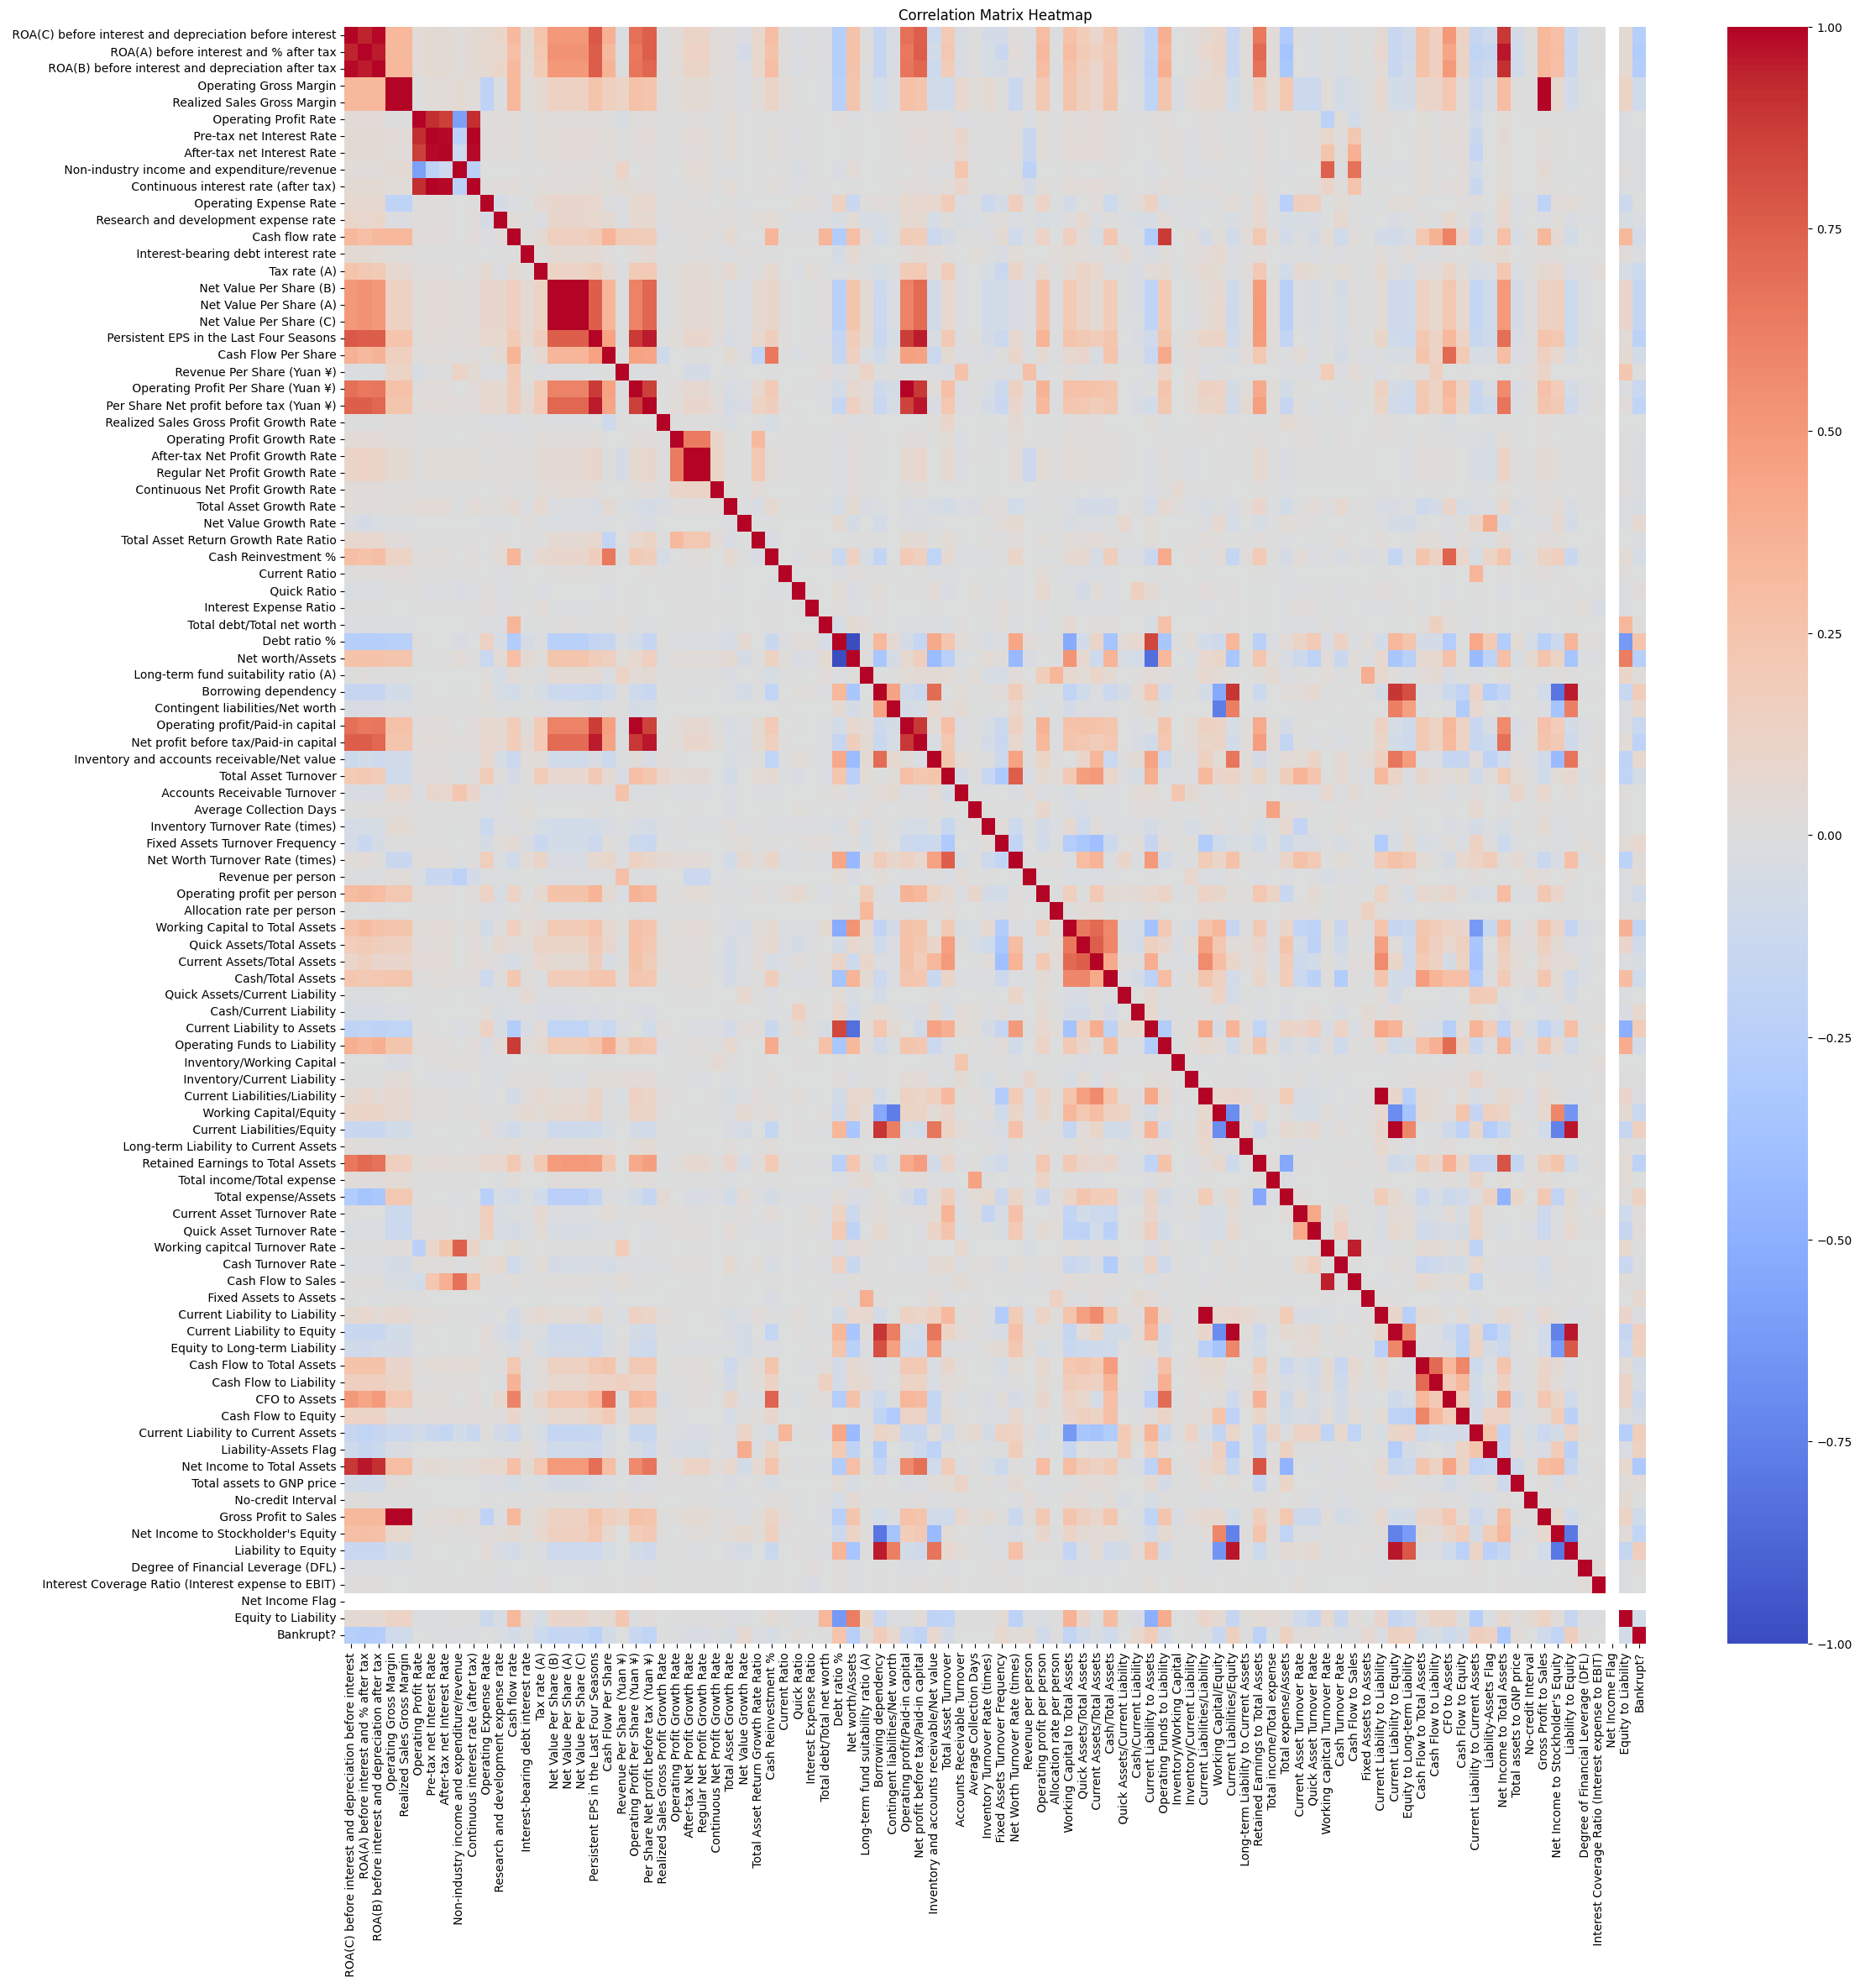

In [114]:
corr = pd.concat([X,y],axis=1).corr()
# Alternatively, using a heatmap
plt.figure(figsize=(25,25))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [5]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

n_features = [5,10,15,20,25,30,35,40]

for i in n_features:
    rfe = RFE(estimator=RandomForestClassifier(n_estimators = 100, random_state=42), n_features_to_select=i)
    rfe.fit(X_train, y_train)

    X_train_transform = rfe.transform(X_train)
    X_test_transform = rfe.transform(X_test)

    score = RandomForestClassifier().fit(X_train_transform,y_train).score(X_test_transform, y_test)
    print(f'Accuracy:{score} in number of features: {i}')

/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Accuracy:0.967741935483871 in number of features: 5


/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Accuracy:0.9700879765395894 in number of features: 10


/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Accuracy:0.9718475073313783 in number of features: 15


/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Accuracy:0.9706744868035191 in number of features: 20


/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Accuracy:0.9718475073313783 in number of features: 25


/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Accuracy:0.9724340175953079 in number of features: 30


/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Accuracy:0.9730205278592375 in number of features: 35


/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Accuracy:0.9712609970674487 in number of features: 40


In [6]:
rfe = RFE(estimator=RandomForestClassifier(n_estimators = 100, random_state=42), n_features_to_select=25)
rfe.fit(X_train, y_train)

features = rfe.get_feature_names_out(X.columns)

/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

In [7]:
df = pd.concat([y,X[features]],axis = 1)
pd.set_option('display.max_colwidth', None)
pd.DataFrame(df.columns)

0
0                                                  Bankrupt?
1    ROA(C) before interest and depreciation before interest
2                Non-industry income and expenditure/revenue
3                        Interest-bearing debt interest rate
4                                    Net Value Per Share (A)
5                                    Net Value Per Share (C)
6                    Persistent EPS in the Last Four Seasons
7                   Per Share Net profit before tax (Yuan ¥)
8                                      Net Value Growth Rate
9                                     Interest Expense Ratio
10                                Total debt/Total net worth
11                                      Borrowing dependency
12                     Net profit before tax/Paid-in capital
13                              Accounts Receivable Turnover
14                           Inventory Turnover Rate (times)
15                           Fixed Assets Turnover Frequency
16                                Allocation rate per person
17                                         Cash/Total Assets
18                                    Cash/Current Liability
19                                 Inventory/Working Capital
20                                    Working Capital/Equity
21                                Net Income to Total Assets
22                        Net Income to Stockholder's Equity
23                        Degree of Financial Leverage (DFL)
24        Interest Coverage Ratio (Interest expense to EBIT)
25                                       Equity to Liability

In [116]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count    6819.00                                                   6819.00   
mean        0.03                                                      0.51   
std         0.18                                                      0.06   
min         0.00                                                      0.00   
25%         0.00                                                      0.48   
50%         0.00                                                      0.50   
75%         0.00                                                      0.54   
max         1.00                                                      1.00   

        Non-industry income and expenditure/revenue  \
count                                       6819.00   
mean                                           0.30   
std                                            0.01   
min                                            0.00   
25%                                            0.30   
50%                                            0.30   
75%                                            0.30   
max                                            1.00   

        Interest-bearing debt interest rate   Net Value Per Share (A)  \
count                               6819.00                   6819.00   
mean                            16448012.91                      0.19   
std                            108275033.53                      0.03   
min                                    0.00                      0.00   
25%                                    0.00                      0.17   
50%                                    0.00                      0.18   
75%                                    0.00                      0.20   
max                            990000000.00                      1.00   

        Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
count                   6819.00                                   6819.00   
mean                       0.19                                      0.23   
std                        0.03                                      0.03   
min                        0.00                                      0.00   
25%                        0.17                                      0.21   
50%                        0.18                                      0.22   
75%                        0.20                                      0.24   
max                        1.00                                      1.00   

        Per Share Net profit before tax (Yuan ¥)   Net Value Growth Rate  \
count                                    6819.00                 6819.00   
mean                                        0.18              1566212.06   
std                                         0.03            114159389.52   
min                                         0.00                    0.00   
25%                                         0.17                    0.00   
50%                                         0.18                    0.00   
75%                                         0.19                    0.00   
max                                         1.00           9330000000.00   

        Interest Expense Ratio  ...   Allocation rate per person  \
count                  6819.00  ...                      6819.00   
mean                      0.63  ...                  11255785.32   
std                       0.01  ...                 294506294.12   
min                       0.00  ...                         0.00   
25%                       0.63  ...                         0.00   
50%                       0.63  ...                         0.01   
75%                       0.63  ...                         0.02   
max                       1.00  ...                9570000000.00   

        Cash/Total Assets   Cash/Current Liability  \
count             6819.00                  6819.00   
mean                 0.12              37159994.15

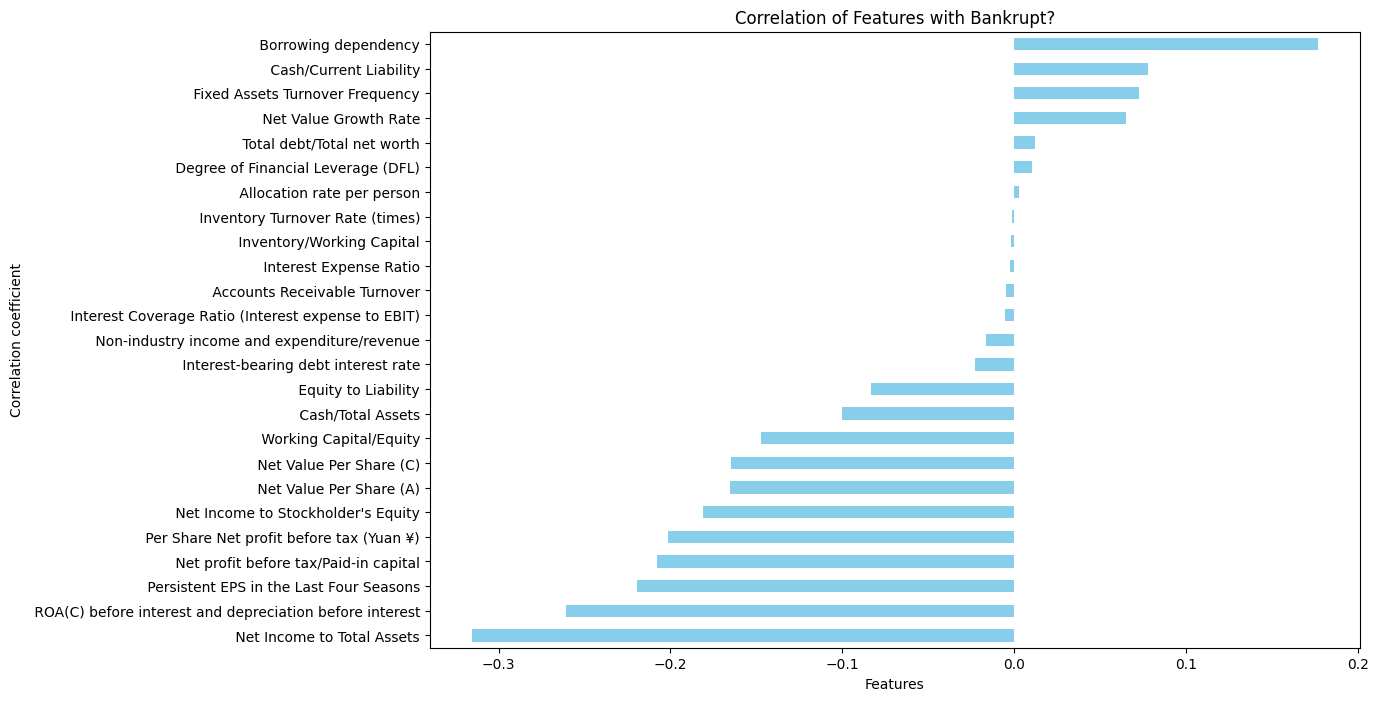

In [115]:
import seaborn as sns

correlation_matrix = df.corr()

# Extract the correlation values with the target variable 'Bankrupt?'
correlation_with_target = correlation_matrix['Bankrupt?'].drop('Bankrupt?')

# Plotting the correlation using a bar plot
plt.figure(figsize=(12, 8))
correlation_with_target.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation of Features with Bankrupt?')
plt.ylabel('Correlation coefficient')
plt.xlabel('Features')
plt.show()

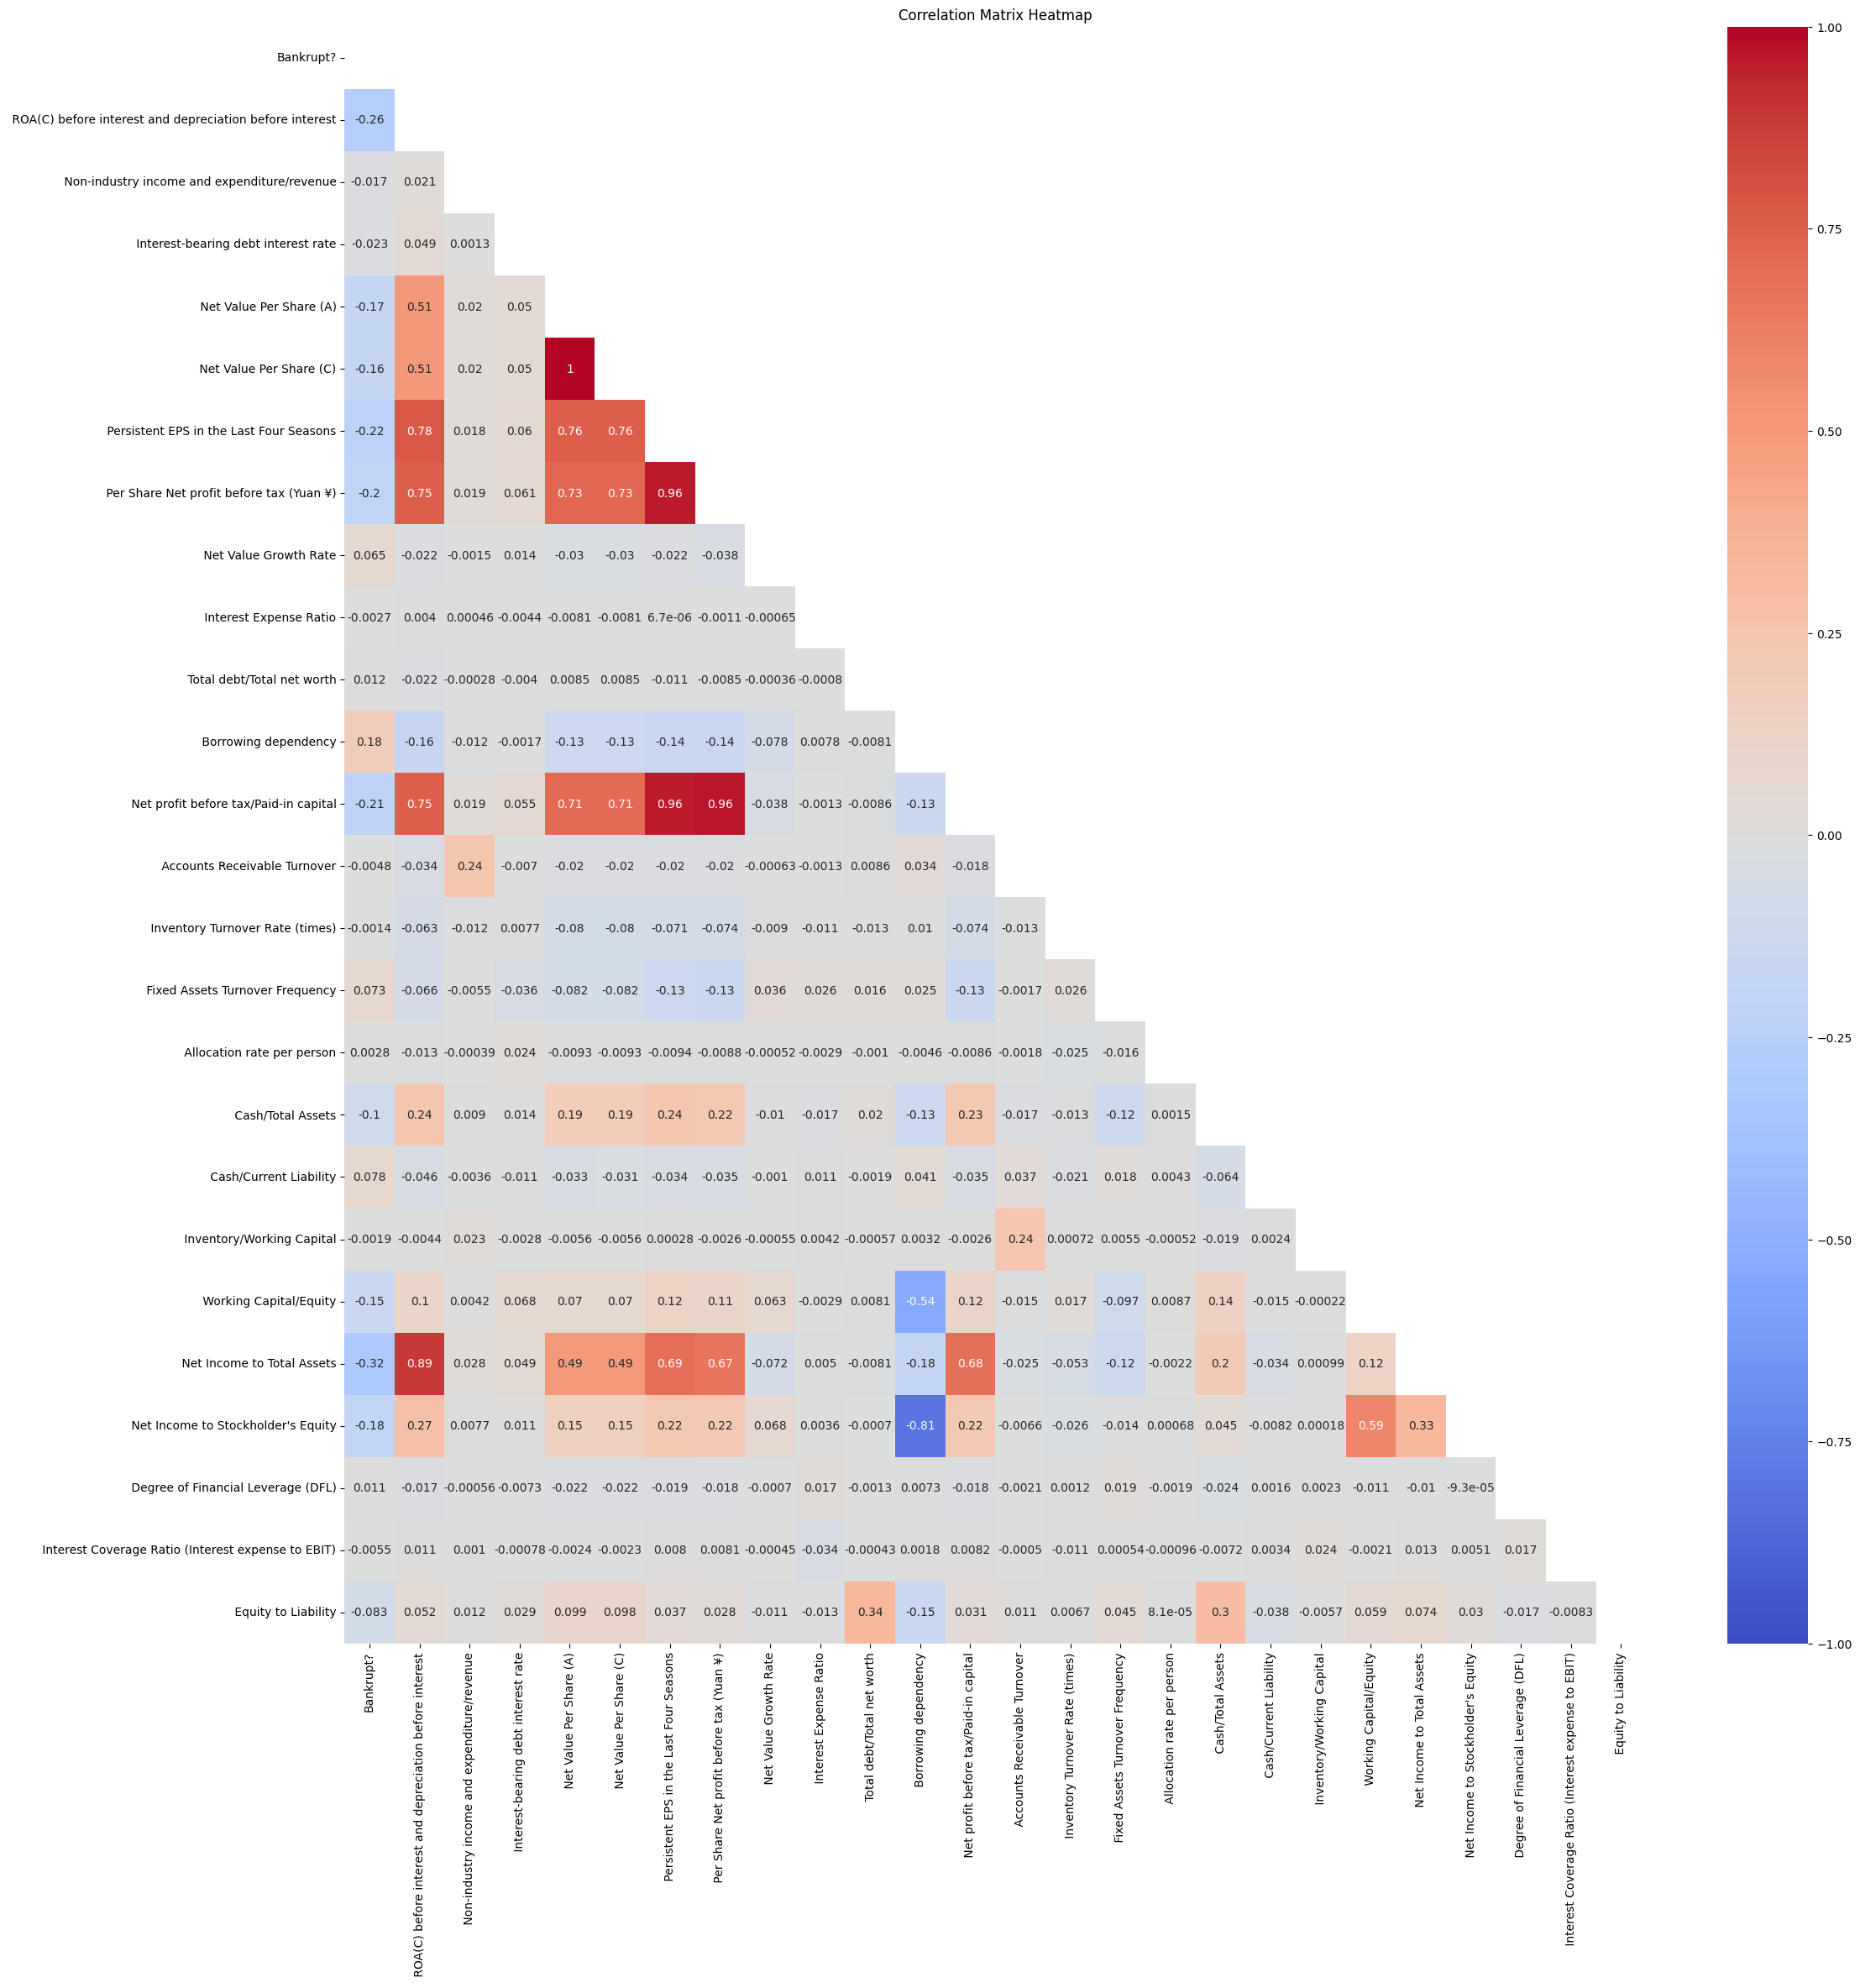

In [9]:
matrix = correlation_matrix
# Alternatively, using a heatmap
plt.figure(figsize=(25,25))
sns.heatmap(matrix, mask = np.triu(np.ones_like(matrix, dtype=bool)), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

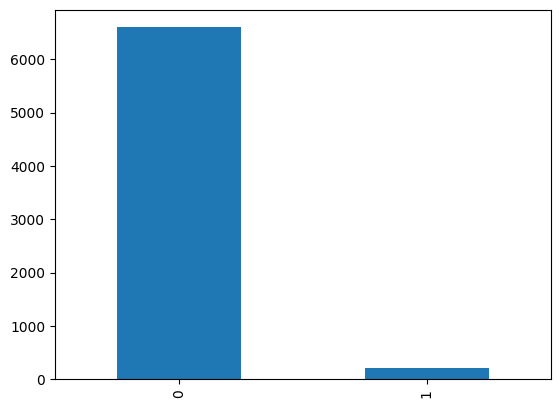

In [41]:
df['Bankrupt?'].value_counts().plot(kind='bar')
df['Bankrupt?'].value_counts(normalize=True)

<Axes: xlabel='Bankrupt?', ylabel=' Net Income to Total Assets'>

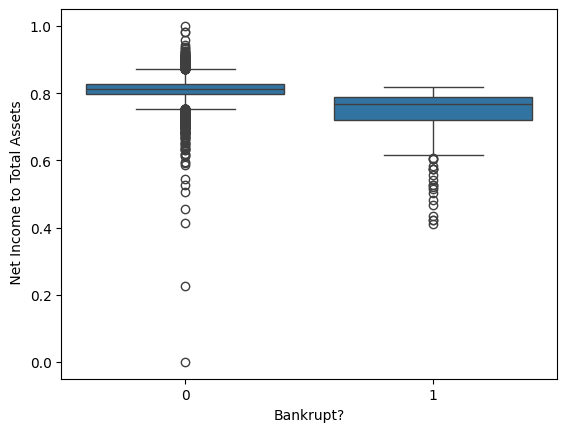

In [11]:
sns.boxplot(data = df, x = 'Bankrupt?', y = ' Net Income to Total Assets')

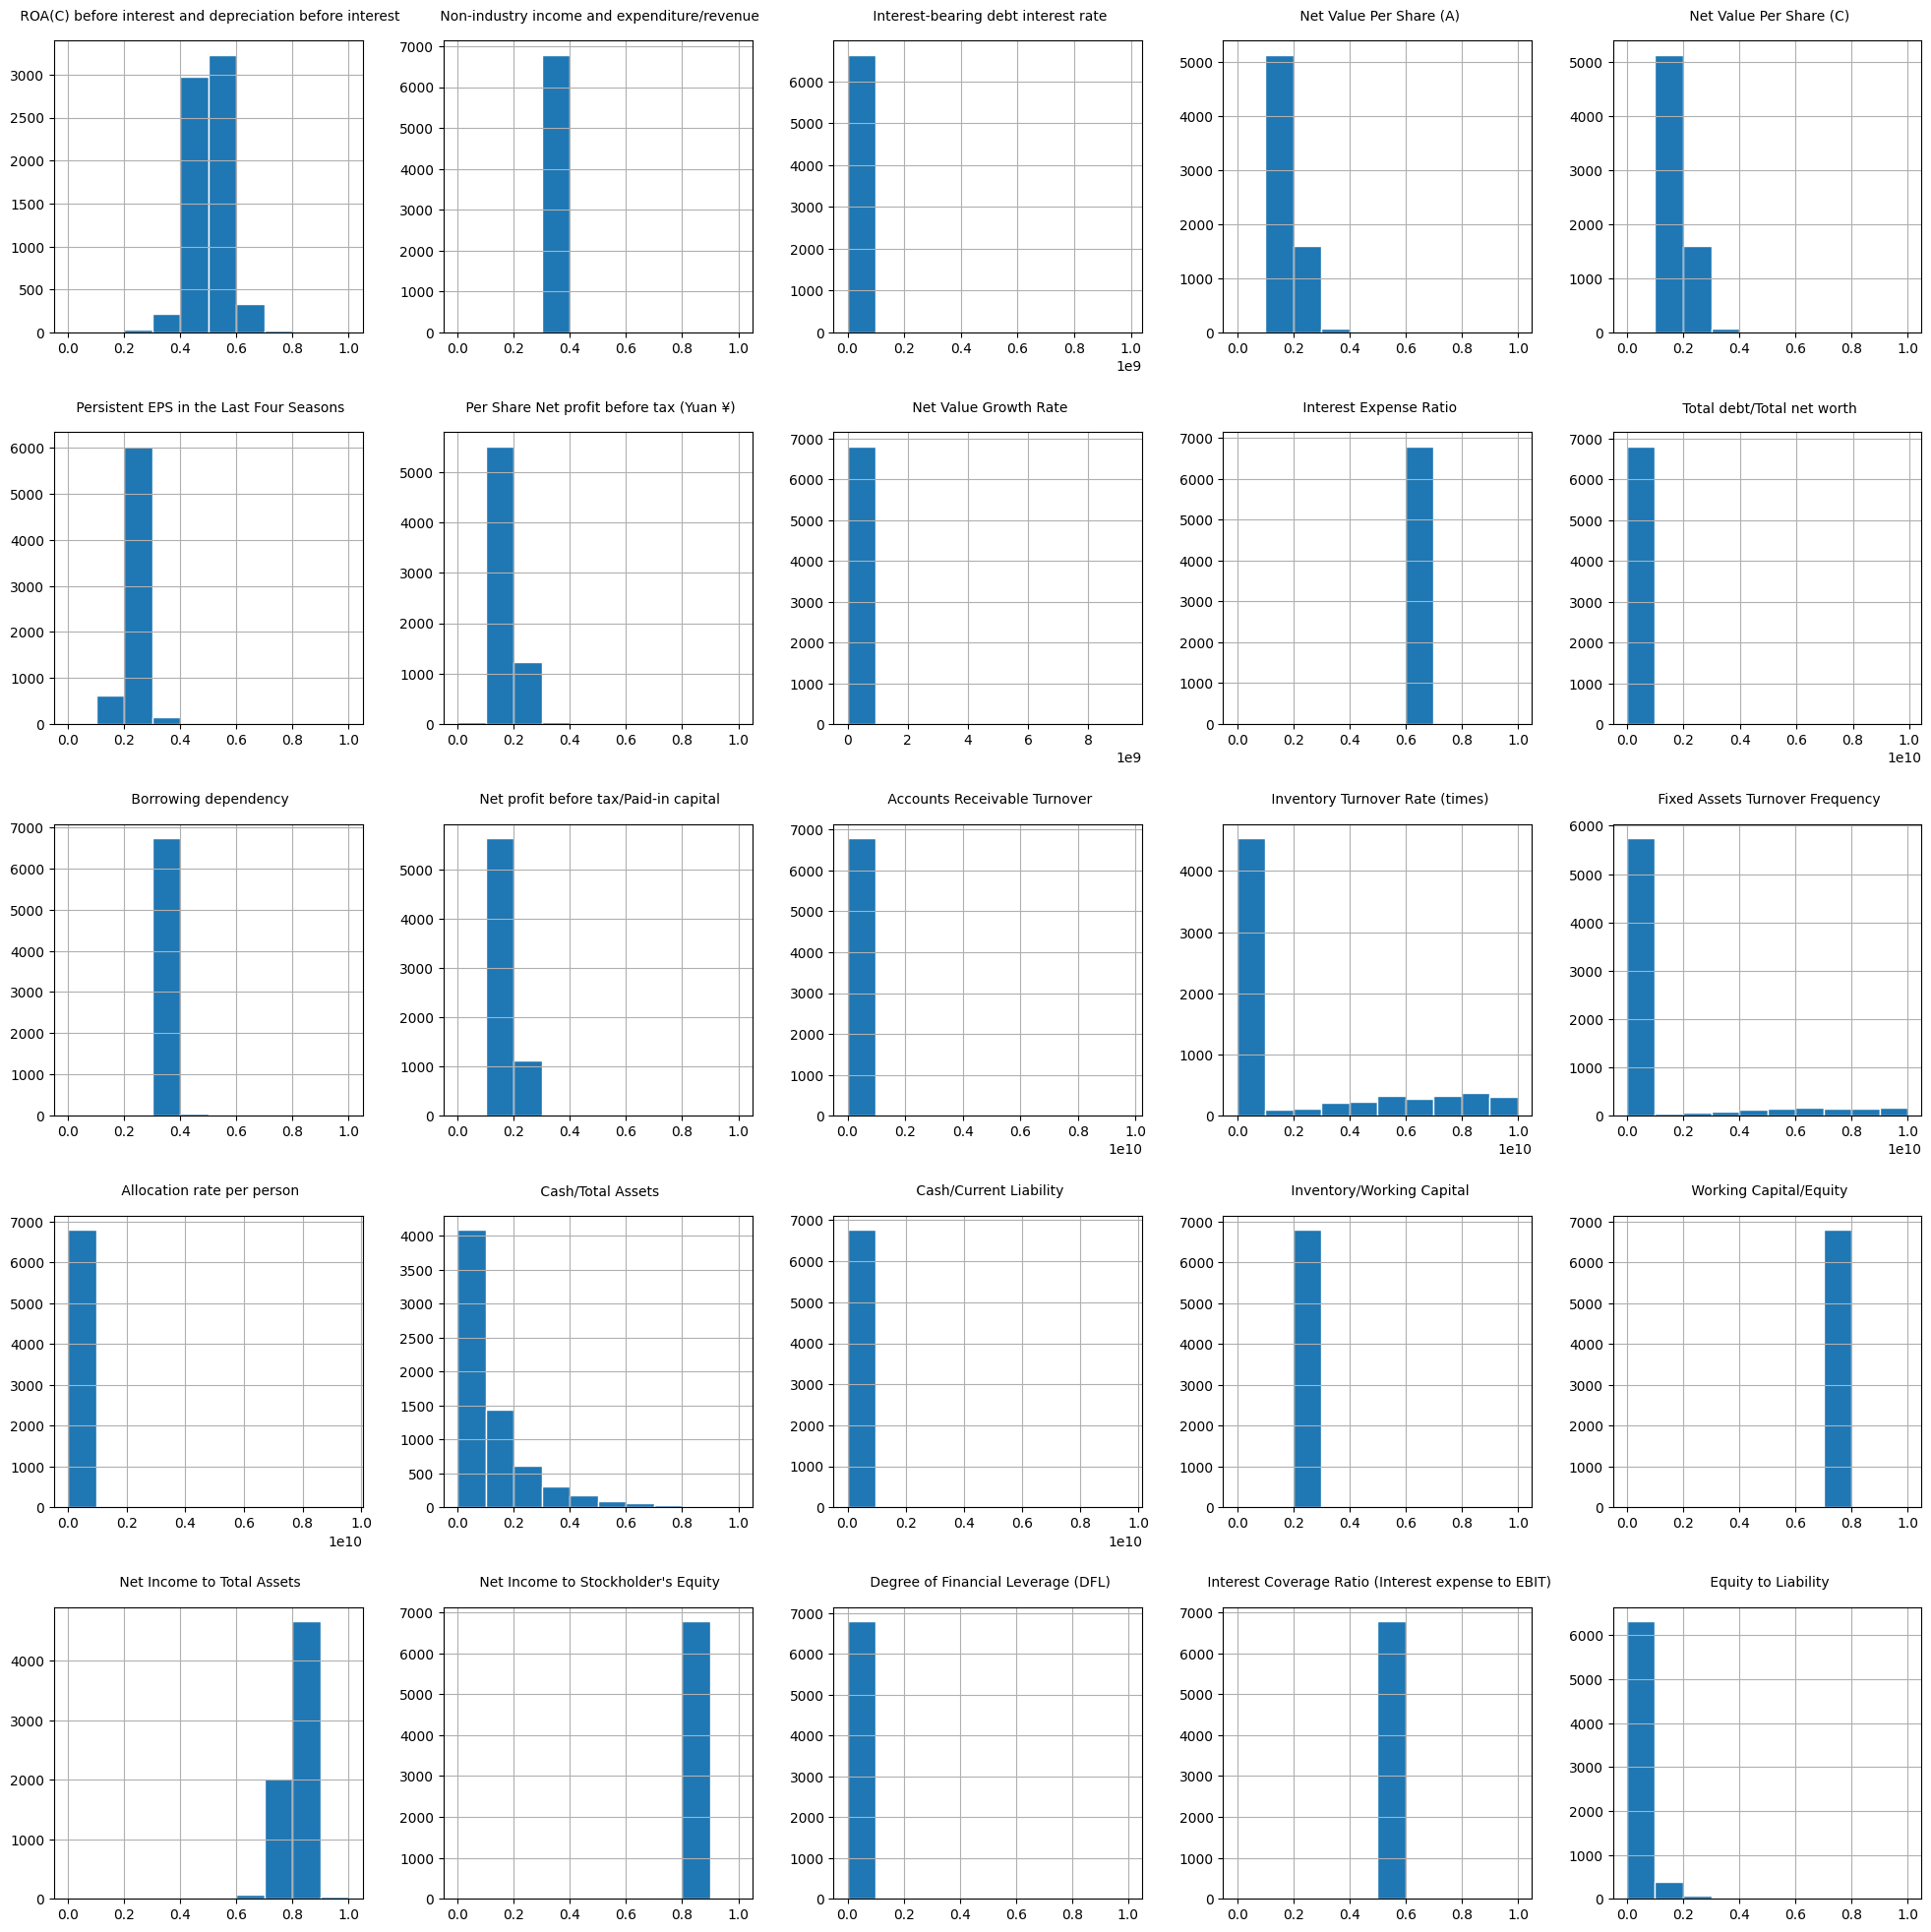

In [12]:
axes = df.drop('Bankrupt?',axis = 1).hist(figsize=(20,20), edgecolor='white')
# 调整每个子图的标题
for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=10, pad=15)  # 调整标题字体大小和间距

# 调整子图之间的间距
plt.tight_layout(pad=2.0)

plt.show()

In [13]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                               6819.000000   
mean      0.032263                                                  0.505180   
std       0.176710                                                  0.060686   
min       0.000000                                                  0.000000   
25%       0.000000                                                  0.476527   
50%       0.000000                                                  0.502706   
75%       0.000000                                                  0.535563   
max       1.000000                                                  1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Interest-bearing debt interest rate   Net Value Per Share (A)  \
count                          6.819000e+03               6819.000000   
mean                           1.644801e+07                  0.190633   
std                            1.082750e+08                  0.033474   
min                            0.000000e+00                  0.000000   
25%                            2.030203e-04                  0.173613   
50%                            3.210321e-04                  0.184400   
75%                            5.325533e-04                  0.199570   
max                            9.900000e+08                  1.000000   

        Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
count               6819.000000                               6819.000000   
mean                   0.190672                                  0.228813   
std                    0.033480                                  0.033263   
min                    0.000000                                  0.000000   
25%                    0.173676                                  0.214711   
50%                    0.184400                                  0.224544   
75%                    0.199612                                  0.238820   
max                    1.000000                                  1.000000   

        Per Share Net profit before tax (Yuan ¥)   Net Value Growth Rate  \
count                                6819.000000            6.819000e+03   
mean                                    0.184361            1.566212e+06   
std                                     0.033180            1.141594e+08   
min                                     0.000000            0.000000e+00   
25%                                     0.170370            4.409689e-04   
50%                                     0.179709            4.619555e-04   
75%                                     0.193493            4.993621e-04   
max                                     1.000000            9.330000e+09   

        Interest Expense Ratio  ...   Allocation rate per person  \
count              6819.000000  ...                 6.819000e+03   
mean                  0.630991  ...                 1.125579e+07   
std                   0.011238  ...                 2.945063e+08   
min                   0.000000  ...                 0.000000e+00   
25%                   0.630612  ...                 4.120529e-03   
50%                   0.630698  ...                 7.844373e-03   
75%                   0.631125  ...                 1.502031e-02   
max                   1.000000  ...                 9.570000e+09   

        Cash/Total Assets   Cash/Current Liability  \
count         6819.000000             6.819000e+03   
mean             0.124095         

<Axes: xlabel=" Net Income to Stockholder's Equity", ylabel=' Borrowing dependency'>

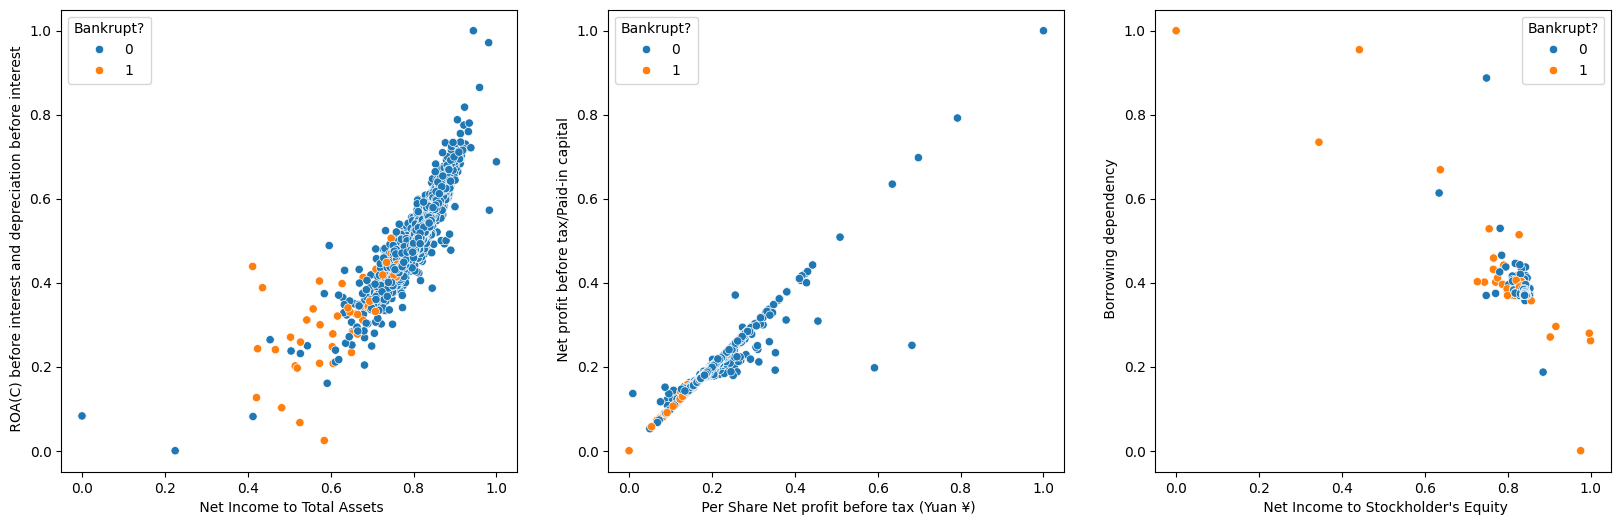

In [17]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))
sns.scatterplot(data=df, x=' Net Income to Total Assets', y=' ROA(C) before interest and depreciation before interest', hue='Bankrupt?', ax=ax[0])
sns.scatterplot(data=df, x=' Per Share Net profit before tax (Yuan ¥)', y=' Net profit before tax/Paid-in capital', hue='Bankrupt?', ax=ax[1])
sns.scatterplot(data=df, x=" Net Income to Stockholder's Equity", y=' Borrowing dependency', hue='Bankrupt?', ax=ax[2])

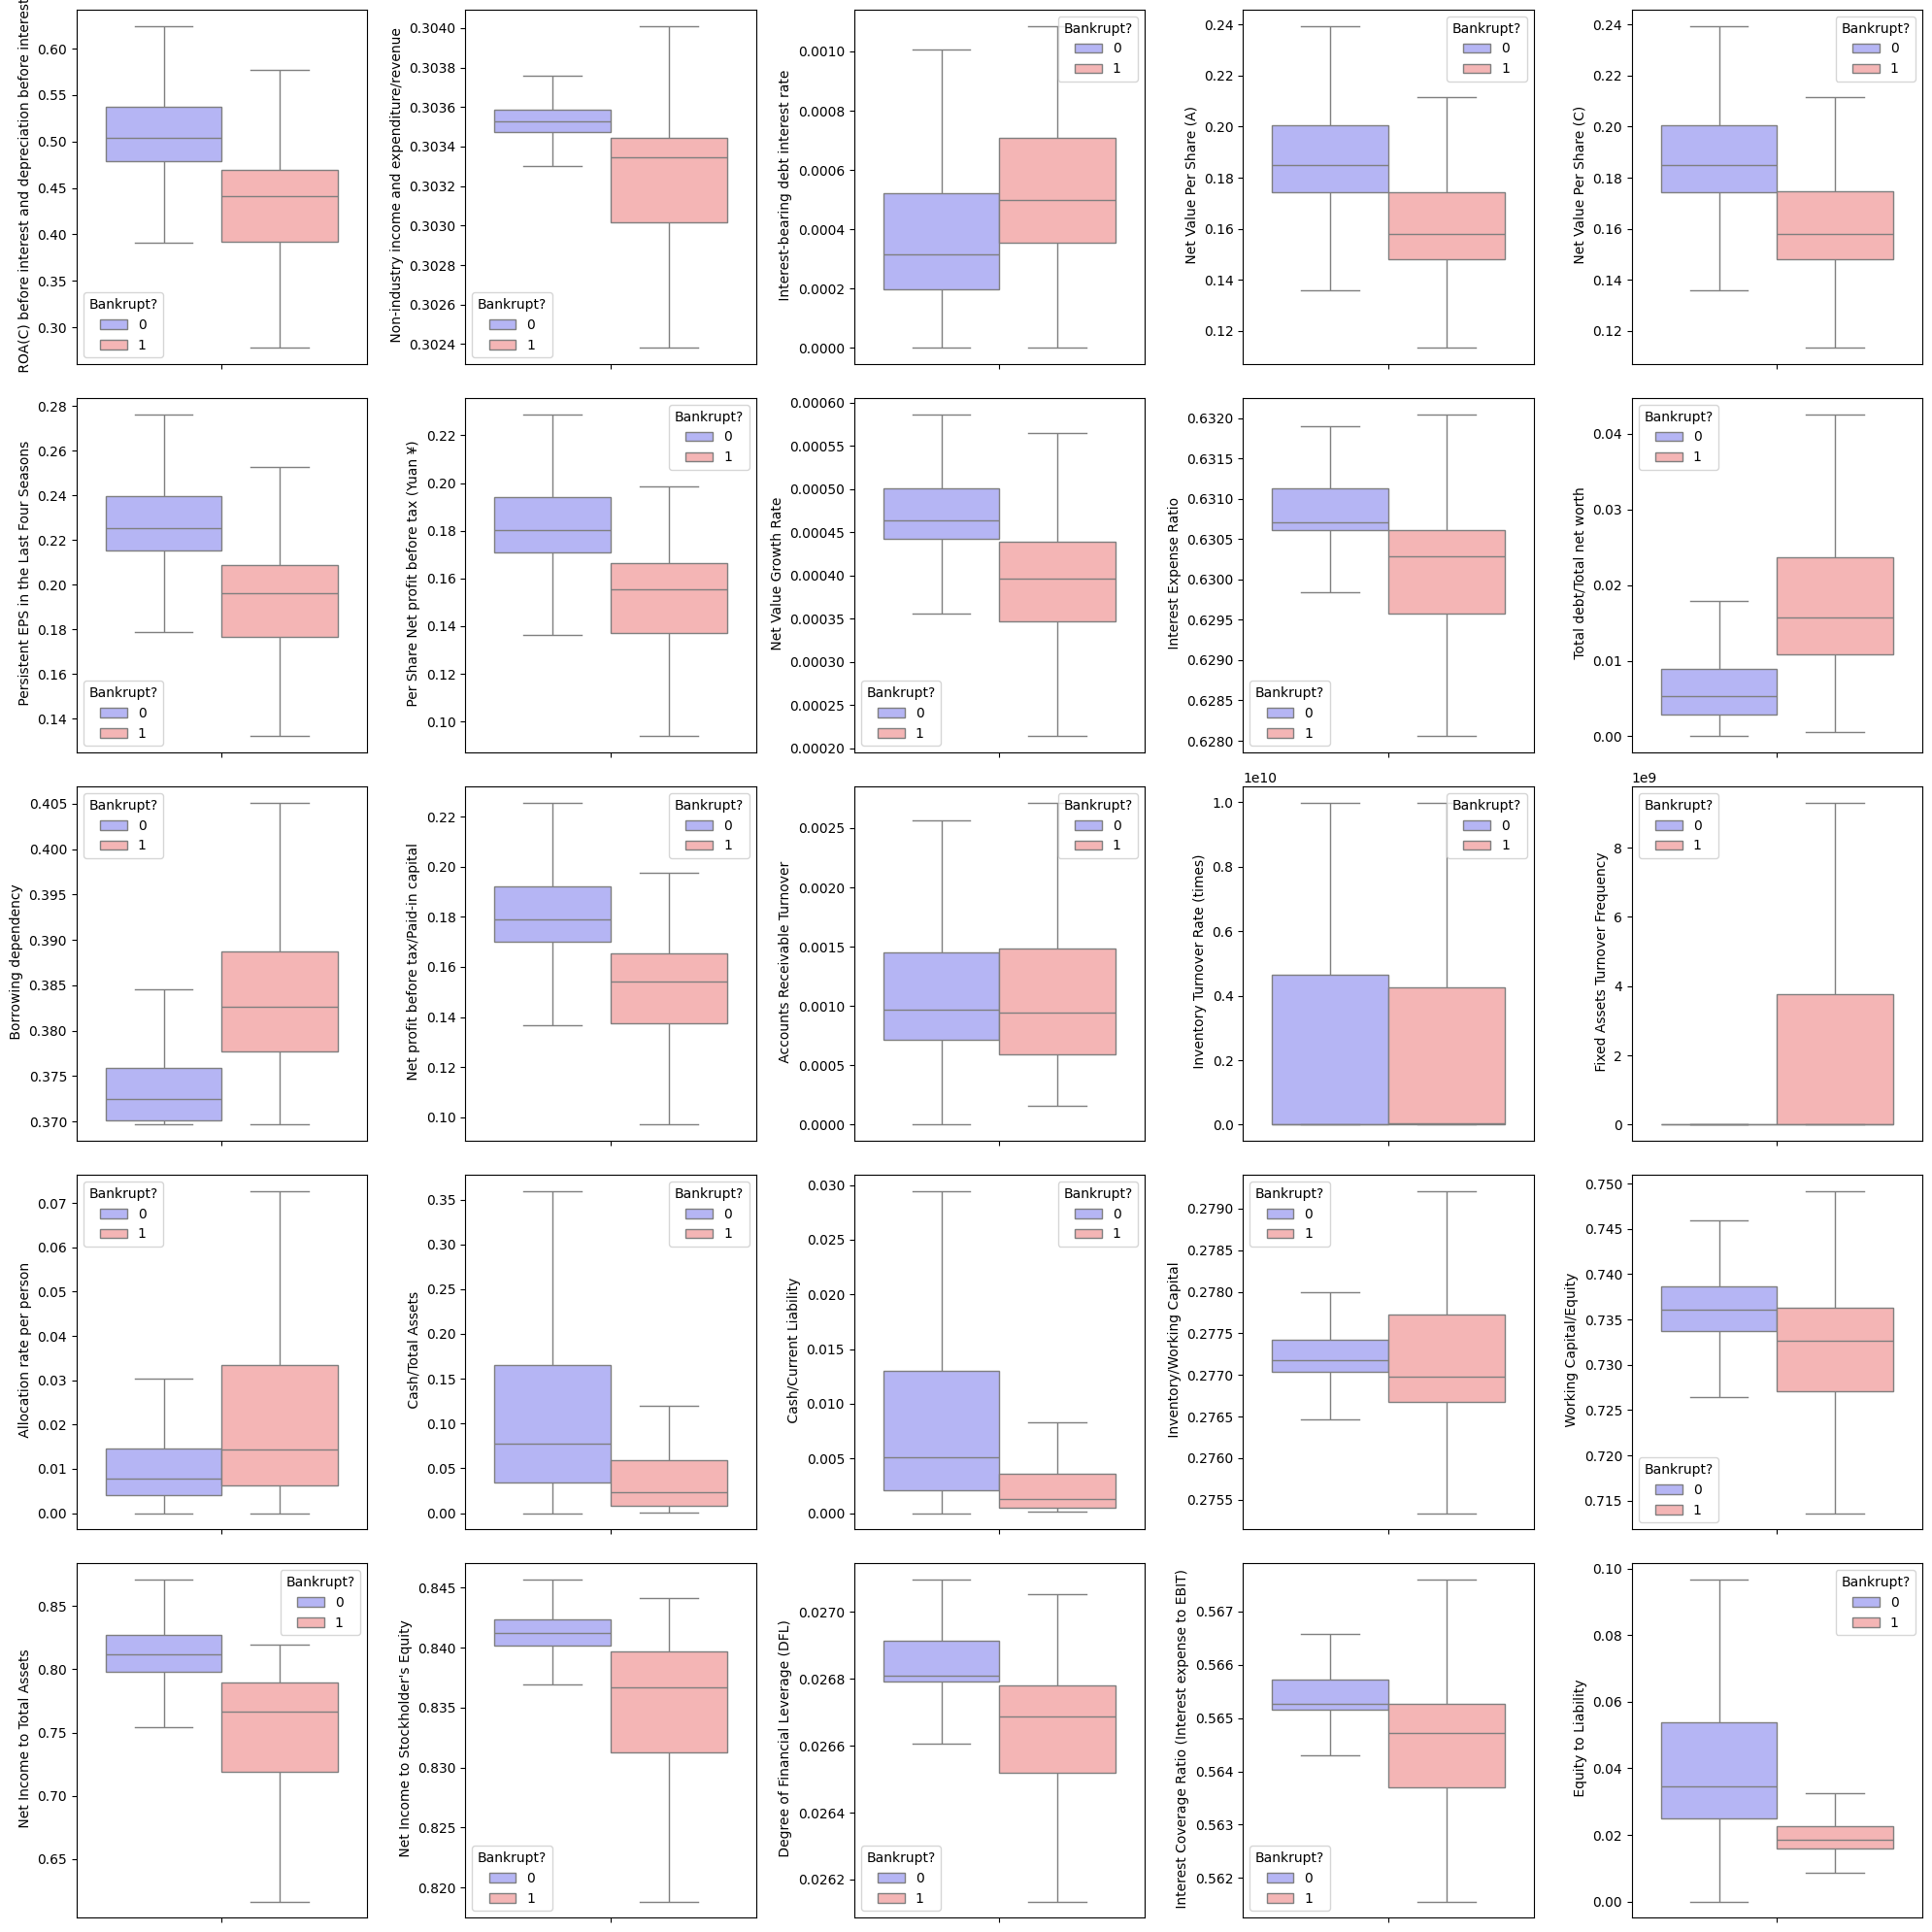

In [119]:
central = df.groupby('Bankrupt?').median().reset_index()
features = list(central.keys()[1:])

fig, ax = plt.subplots(5,5, figsize=(20,20))

ax = ax.ravel()
position = 0

for i in features:
    sns.boxplot(data=df, hue='Bankrupt?', y=i, ax=ax[position], palette='bwr',showfliers=False)
    position += 1
    
plt.tight_layout()
plt.show()
# display(central)

In [132]:
pd.set_option('display.float_format', lambda x: f'{x:.6f}')
display(central[' Allocation rate per person'])

0   0.007734
1   0.014310
Name:  Allocation rate per person, dtype: float64

Best value of n_component for 99% variance : 11
Best value of n_component for 95% variance : 8
Best value of n_component for 90% variance : 7


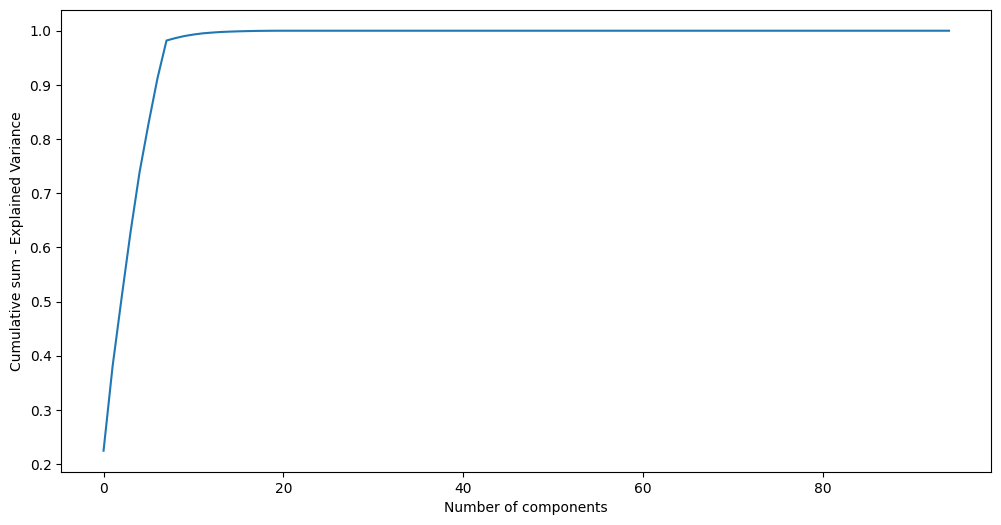

In [20]:
!pip install imbalanced-learn
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score,roc_auc_score
from sklearn.svm import SVC
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#defining PCA 
pca = PCA().fit(X_train)

plt.figure(figsize = (12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative sum - Explained Variance')

#fitting PCA on our X
pca = PCA(n_components=0.99).fit(X)
print(f'Best value of n_component for 99% variance : {pca.n_components_}')

pca = PCA(n_components=0.95).fit(X)
print(f'Best value of n_component for 95% variance : {pca.n_components_}')

pca = PCA(n_components=0.90).fit(X)
print(f'Best value of n_component for 90% variance : {pca.n_components_}')

### Model

In [36]:
acc_baseline = df['Bankrupt?'].value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9677


In [46]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# initialize randomundersampler object
under_sampler = RandomUnderSampler(random_state = 42)
# create undersampled training data
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# initialize randomoversampler object
over_sampler = RandomOverSampler(random_state=42)
# create oversampled training data
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

print("Before sampling : ")
print(f"                       Bankrupt 1 = {len(y_train[y_train['Bankrupt?']==1])}")
print(f"                       Bankrupt 0 = {len(y_train[y_train['Bankrupt?']==0])}")
print("========="*6)

print("After Oversampling : ")
print(f"                       Bankrupt 1 = {len(y_train_over[y_train_over['Bankrupt?']==1])}")
print(f"                       Bankrupt 0 = {len(y_train_over[y_train_over['Bankrupt?']==0])}")
print("========="*6)

print("After Undersampling : ")
print(f"                       Bankrupt 1 = {len(y_train_under[y_train_under['Bankrupt?']==1])}")
print(f"                       Bankrupt 0 = {len(y_train_under[y_train_under['Bankrupt?']==0])}")

Before sampling : 
                       Bankrupt 1 = 162
                       Bankrupt 0 = 4952
After Oversampling : 
                       Bankrupt 1 = 4952
                       Bankrupt 0 = 4952
After Undersampling : 
                       Bankrupt 1 = 162
                       Bankrupt 0 = 162


In [49]:
X_pca = PCA(11).fit_transform(X) 
X_pca

array([[ 2.16532981e+09, -3.81494889e+07, -3.23761461e+09, ...,
        -6.72487150e+07, -6.17697936e+07, -1.00873805e+08],
       [ 4.90236601e+08,  8.46379452e+09,  8.74609954e+08, ...,
         3.30543592e+07, -7.74276846e+07, -6.04772782e+07],
       [-2.62013847e+09, -2.16996639e+09, -1.23941619e+09, ...,
        -2.73737145e+08, -8.12374200e+07,  5.23623173e+09],
       ...,
       [-2.62966345e+09, -2.70482399e+09, -1.45136980e+09, ...,
        -1.05510747e+08, -5.63597402e+07, -6.90049769e+07],
       [-3.93145611e+09,  1.16235646e+09,  5.16590205e+08, ...,
         1.57067774e+08,  3.11636269e+09, -2.01837367e+05],
       [-2.50663412e+09, -2.09832184e+09, -6.90906267e+08, ...,
        -9.93611483e+07, -6.83395069e+07, -7.53747941e+07]])

In [52]:
!pip install lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Fit all models
clf_sample = LazyClassifier(predictions=True)
models_sample, predictions_sample = clf_sample.fit(X_train, X_test, y_train, y_test)

clf_oversample = LazyClassifier(predictions=True)
models_oversample, predictions_oversample = clf_oversample.fit(X_train_over, X_test, y_train_over, y_test)

clf_undersample = LazyClassifier(predictions=True)
models_undersample, predictions_undersample = clf_undersample.fit(X_train_under, X_test, y_train_under, y_test)

 97%|█████████▋| 28/29 [00:46<00:00,  1.22it/s]

[LightGBM] [Info] Number of positive: 162, number of negative: 4952
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23713
[LightGBM] [Info] Number of data points in the train set: 5114, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.031678 -> initscore=-3.419950
[LightGBM] [Info] Start training from score -3.419950


 97%|█████████▋| 28/29 [01:58<00:01,  1.87s/it]

[LightGBM] [Info] Number of positive: 4952, number of negative: 4952
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23670
[LightGBM] [Info] Number of data points in the train set: 9904, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


 97%|█████████▋| 28/29 [00:08<00:00,  3.57it/s]

[LightGBM] [Info] Number of positive: 162, number of negative: 162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9796
[LightGBM] [Info] Number of data points in the train set: 324, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

100%|██████████| 29/29 [00:09<00:00,  3.21it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [82]:
result = pd.concat([models_sample.sort_values(by=['Accuracy','F1 Score','ROC AUC',],ascending=[False,False,False]).reset_index(['Model'])['Model'],
           models_oversample.sort_values(by=['Accuracy','F1 Score','ROC AUC',],ascending=[False,False,False]).reset_index(['Model'])['Model'],
           models_undersample.sort_values(by=['Accuracy','F1 Score','ROC AUC',],ascending=[False,False,False]).reset_index(['Model'])['Model']],
          axis = 1)
result.columns = ['Model_sample', 'Model_oversample', 'Model_undersample']
result.head()

Model_sample        Model_oversample     Model_undersample
0    ExtraTreesClassifier          LGBMClassifier       DummyClassifier
1          LGBMClassifier  RandomForestClassifier            GaussianNB
2               LinearSVC    ExtraTreesClassifier         XGBClassifier
3  RandomForestClassifier         DummyClassifier        LGBMClassifier
4  CalibratedClassifierCV           XGBClassifier  ExtraTreesClassifier

**Choose ExtraTreesClassifier, LGBMClassifier, and RandomForestClassifier as predict model**

In [92]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier

In [91]:
models = {
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=42),
    'LGBMClassifier': LGBMClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}

results = {
    'Dataset': [],
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'ROC AUC': []
}

datasets = {'Sample': [X_train, y_train], 'Oversample': [X_train_over, y_train_over], 'Undersample': [X_train_under, y_train_under]}

for dataset_name, data in datasets.items():
    for model_name, model in models.items():
        num_tree_processor = SimpleImputer()
        pipeline = make_pipeline(num_tree_processor, model)
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1]  # For ROC AUC
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba)
        
        results['Dataset'].append(dataset_name)
        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['F1 Score'].append(f1)
        results['ROC AUC'].append(roc_auc)

# Create a DataFrame to display the results
pd.DataFrame(results)

[LightGBM] [Info] Number of positive: 162, number of negative: 4952
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23712
[LightGBM] [Info] Number of data points in the train set: 5114, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.031678 -> initscore=-3.419950
[LightGBM] [Info] Start training from score -3.419950
[LightGBM] [Info] Number of positive: 162, number of negative: 4952
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23712
[LightGBM] [Info] Number of data points in the train set: 5114, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.031678 -> initscore=-3.419950
[LightGBM] [Info] Start training from score -3.419950
[LightGBM] [Info] 

Dataset                   Model  Accuracy  F1 Score  ROC AUC
0       Sample    ExtraTreesClassifier      0.97      0.31     0.93
1       Sample          LGBMClassifier      0.97      0.41     0.94
2       Sample  RandomForestClassifier      0.97      0.35     0.92
3   Oversample    ExtraTreesClassifier      0.97      0.31     0.93
4   Oversample          LGBMClassifier      0.97      0.41     0.94
5   Oversample  RandomForestClassifier      0.97      0.35     0.92
6  Undersample    ExtraTreesClassifier      0.97      0.31     0.93
7  Undersample          LGBMClassifier      0.97      0.41     0.94
8  Undersample  RandomForestClassifier      0.97      0.35     0.92

**LGBM Classifier performs the best in every dataset**

In [94]:
from sklearn.model_selection import GridSearchCV, cross_val_score
clf = make_pipeline(SimpleImputer(), LGBMClassifier(random_state=42))
cv_scores = cross_val_score(clf,X_train_over, y_train_over,cv=5, n_jobs=-1)
print(cv_scores)

[LightGBM] [Info] Number of positive: 3962, number of negative: 3961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23558
[LightGBM] [Info] Number of data points in the train set: 7923, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500063 -> initscore=0.000252
[LightGBM] [Info] Start training from score 0.000252
[LightGBM] [Info] Number of positive: 3962, number of negative: 3961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23566
[LightGBM] [Info] Number of data points in the train set: 7923, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500063 -> initscore=0.000252
[LightGBM] [Info] Start training from score 0.000252
[LightGBM] [Info] Nu

In [96]:
param_grid = {
    'lgbmclassifier__num_leaves': [31, 50, 70],
    'lgbmclassifier__learning_rate': [0.01, 0.1, 0.2],
    'lgbmclassifier__n_estimators': [100, 200, 500],
    'lgbmclassifier__max_depth': [-1, 10, 20, 30]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_over, y_train_over)
best_model = grid_search.best_estimator_
    
# Predict and evaluate the model
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)


[LightGBM] [Info] Number of positive: 3962, number of negative: 3961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23558
[LightGBM] [Info] Number of data points in the train set: 7923, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500063 -> initscore=0.000252
[LightGBM] [Info] Start training from score 0.000252
[LightGBM] [Info] Number of positive: 3962, number of negative: 3961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23566
[LightGBM] [Info] Number of data points in the train set: 7923, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500063 -> initscore=0.000252
[LightGBM] [Info] Start training from score 0.000252
[LightGBM] [Info] Nu

Test Accuracy: 0.9695


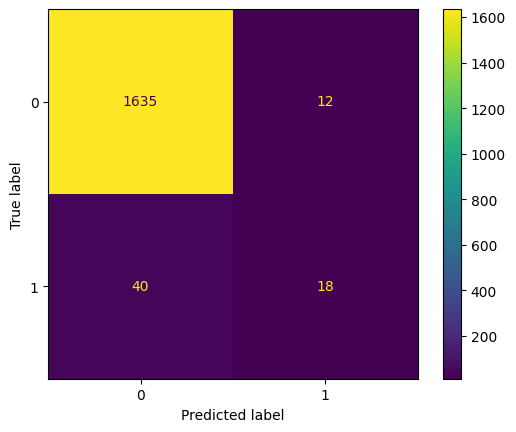

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

print("Test Accuracy:", round(accuracy, 4))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

In [102]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1647
           1       0.60      0.31      0.41        58

    accuracy                           0.97      1705
   macro avg       0.79      0.65      0.70      1705
weighted avg       0.96      0.97      0.96      1705



Text(0.5, 1.0, 'Feature Importance')

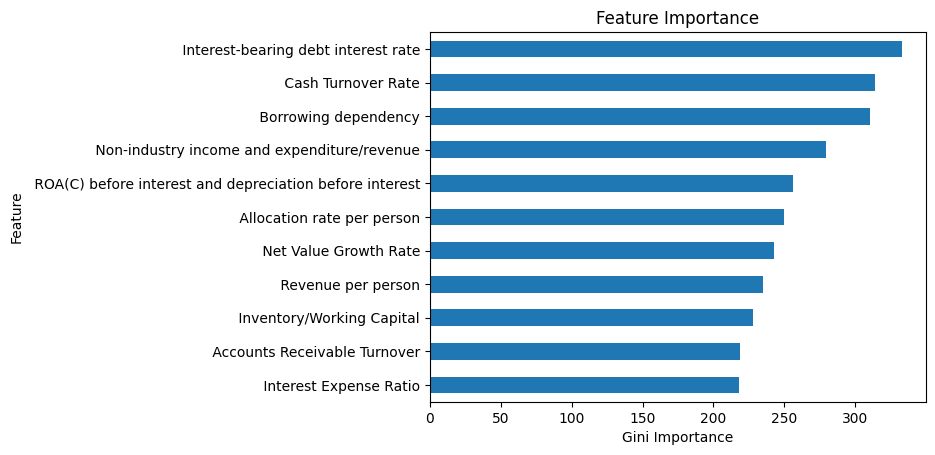

In [110]:
# Get feature names from training data
features = X_train.columns
# Extract importances from model
importances = best_model.named_steps['lgbmclassifier'].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(11).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

In [111]:
import pickle
# Save model
with open("final_model.pkl", 'wb') as f:
    pickle.dump(model, f)